<a href="https://colab.research.google.com/github/oferbaharav/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Ofer_Baharav_Copy_of_LS_DS_Unit_4_Sprint_Challenge_2_DSPT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

# Your Answer Here - Change the Cell to Markdown

* Neuron: a unit capable of logic such as takes weighted inputs, applies 
activation, and returns an output
* Input Layer: this is the layer that holds the data that the model will train on. Neurons here accept input from the dataset (like dog, cat)
* Hidden Layer: this layer (or layers) sits between the input and output layers and aplies activation function then passes the results
* Output Layer: last layer that receives input from previous layer, might also have an activation function, returns an output that is the model's prediction
* Activation Function: functions that model non linear relationships like sigmoid and relu
* Backpropagation to a 5 year old: making a computer program learn from mistakes and getting better at doing something with training

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

# Your Answer Here - Change the Cell to Markdown
* You take an inputs, you multiply those by weights, sum the inputs * weights, and get output as the prediction

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [10]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [11]:
X.shape

(300, 2)

In [12]:
y.shape

(300,)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model1 = Sequential()
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X, y, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.5433
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.5567
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.5667
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.5700
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.5733
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.5767
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.5833
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.5900
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy: 0.5933
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.5967
Epoch 11/

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [0]:
#for comparison only:
# This is our perceptron from Monday's by-hand: 
model1 = Sequential()
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X, y, epochs=500)

In [20]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='sigmoid'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
h2 = model2.fit(X, y, epochs=1500, callbacks=[myCallback()])

Epoch 1/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.5333
Epoch 2/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.5267
Epoch 3/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.5267
Epoch 4/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.5267
Epoch 5/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.5267
Epoch 6/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.5267
Epoch 7/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.5267
Epoch 8/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.5267
Epoch 9/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 0.5267
Epoch 10/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.5267

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


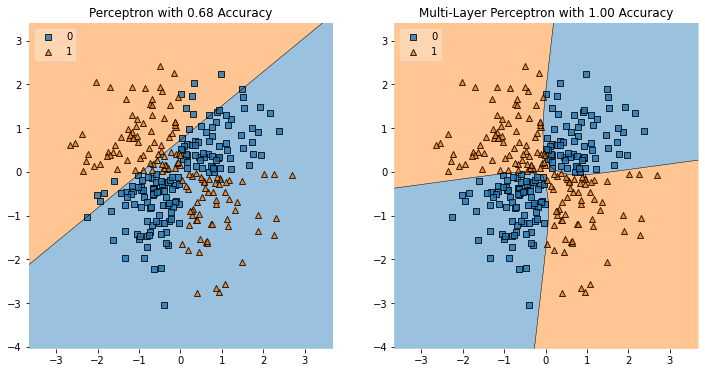

In [26]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

# Your Answer Here - Change the Cell to Markdown

* Q1: model1 achieves ~ 0.7 accuracy because it's a linear function because there's only one layer
* Q2: The architectural property of the multi-layer perceptron that allows it to more accurately learn the relationship between X and y is: It allows it to compute a curve (as seen in plot for model2 above) that is able to accurately represent the relationship between X and y
*Q3: In more complex data such as images there are many relationships between different parts of the image including lines curves and shades


## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [29]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
print(df.shape)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [54]:
#baseline
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

    # create model
model = create_model()


                                     

model.fit(X,Y, 
          epochs=3, 
          )
scores = model.evaluate(X, Y)
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

Epoch 1/3
10/10 [==============================] - 0s 2ms/step - loss: 16.7571 - accuracy: 0.3597
Epoch 2/3
10/10 [==============================] - 0s 1ms/step - loss: 6.5328 - accuracy: 0.4917
Epoch 3/3
10/10 [==============================] - 0s 1ms/step - loss: 2.7511 - accuracy: 0.6898
loss: 2.751128911972046
accuracy: 68.97689700126648


In [42]:
# Your Code Here
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset


dataset = df.values

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# Function to create model, required for KerasClassifier
def create_model(optimizer, init_mode):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu', kernel_initializer = init_mode))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 40, 100],
              'epochs': [60,200,500],
              'optimizer': ['adam', 'rmsprop'],
              'init_mode': ['uniform', 'lecun_uniform', 'glorot_uniform']
              #'learn_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
              #'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
              }
                                     

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 


Best: 0.7789617419242859 using {'batch_size': 10, 'epochs': 200, 'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
Means: 0.735846996307373, Stdev: 0.041365214644615254 with: {'batch_size': 10, 'epochs': 60, 'init_mode': 'uniform', 'optimizer': 'adam'}
Means: 0.7389071106910705, Stdev: 0.06265680174054719 with: {'batch_size': 10, 'epochs': 60, 'init_mode': 'uniform', 'optimizer': 'rmsprop'}
Means: 0.6865573763847351, Stdev: 0.09103953077820734 with: {'batch_size': 10, 'epochs': 60, 'init_mode': 'lecun_uniform', 'optimizer': 'adam'}
Means: 0.6470491766929627, Stdev: 0.0457101156763319 with: {'batch_size': 10, 'epochs': 60, 'init_mode': 'lecun_uniform', 'optimizer': 'rmsprop'}
Means: 0.7159016251564025, Stdev: 0.08292885940622693 with: {'batch_size': 10, 'epochs': 60, 'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
Means: 0.6992349743843078, Stdev: 0.05992179809247221 with: {'batch_size': 10, 'epochs': 60, 'init_mode': 'glorot_uniform', 'optimizer': 'rmsprop'}
Means: 0.756120216846